# <font color=#0404B4>**LAB 02 - TRỰC QUAN HÓA DỮ LIỆU** </font>

### <font color=#0404B4> Bảng thành viên nhóm </font>
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |
| <center>20120053<center>  |   <center>Nguyễn Thành Đạt<center>   | 
| <center>20120071<center>  |<center>Nguyễn Thị Bích Hà<center> |
| <center>20120084<center>  | <center>Nguyễn Văn Hiếu<center> |
| <center>20120113<center>  | <center>Lê Nguyên Khang<center> |

# <font color=#0404B4>Import thư viện</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# <font color=#0404B4> A. Thu thập dữ liệu</font>

### Tại sao lại chọn bộ dữ liệu này?
Nhóm muốn tìm hiểu tuổi thọ trung bình của các nước trên thế giới, cụ thể hơn là về tỉ lệ sinh, tỉ lệ tử và những ảnh hưởng cụ thể tác động lên các yếu tố đã được đề cập. Những quốc gia có tuổi thọ trung bình ở những mức độ cụ thể sẽ thể hiện điều gì qua các yếu tố liên quan khác, liệu có sự liên quan nào giữa tuổi thọ trung bình và mức sống hoặc điều kiện phát triển của một quốc gia hay không. Nhóm có rất nhiều câu hỏi muốn khám phá từ chủ đề tuổi tác trung bình của một quốc gia nên đã quyết định chọn bộ dữ liệu này.

Nhóm đã chọn bộ dữ liệu cung cấp thông tin về tuổi thọ trung bình và các yếu tố liên quan của các quốc gia trên thế giới, và bộ dữ liệu này được nhóm lấy từ [Kaggle](https://www.kaggle.com/datasets/census/international-data?select=midyear_population_5yr_age_sex.csv&fbclid=IwAR1iVkXkPgwGhwS5BuKX7oZnUKSWuAlsCq2odeJZ2rCXMAE_xN_BjgJEpMk).



### Nguồn gốc và giấy phép sử dụng của bộ dữ liệu?
Bộ dữ liệu này được tạo bởi [Cục điều tra dân số Hoa Kỳ](http://www.census.gov/), cung cấp các ước tính về dân số các quốc gia kể từ năm 1950 và dự đoán đến năm 2050. Cụ thể, bộ dữ liệu bao gồm các số liệu dân số giữa năm được chia nhỏ theo độ tuổi và phân bổ giới tính khi sinh. Ngoài ra, chúng cung cấp dữ liệu chuỗi thời gian cho các thuộc tính bao gồm tỷ lệ sinh, tỷ lệ sinh, tỷ lệ tử vong và tỷ lệ di cư.

Bộ dữ liệu được cho phép sử dụng với mục đích phân tích 

   **Lưu ý:** Các quốc gia và khu vực được Bộ Ngoại giao Hoa Kỳ công nhận phải có dân số ít nhất là 5.000 người. Và bộ dữ liệu này được đăng tải vào năm 2017, tức là các dữ liệu được cung cấp từ năm 2018 trở đi được xem là dữ liệu dự đoán.



<a name="2"></a>
# <font color=#0404B4> B. Khám phá và tiền xử lý dữ liệu</font>


### 1. Đọc dữ liệu từ file và merge dữ liệu lại thành 1 dataframe

Do bộ dữ liệu có nhiều file csv riêng lẻ nên nhóm thực hiện merge các file cần phân tích lại và lưu vào một DataFrame `df`.

- `df1` chứa tập dữ liệu nằm trong file `mortality_life_expectancy.csv`, file này chứa các thông tin liên quan đến tuổi thọ trung bình của các quốc gia.

In [3]:
df1 = pd.read_csv("mortality_life_expectancy.csv")

In [4]:
df1.shape

(15106, 15)

- `df2` chứa tập dữ liệu nằm trong file `age_specific_fertility_rates.csv`, file này chứa các thông tin liên quan đến tỷ suất sinh đặc trưng theo từng độ tuổi.

In [5]:
df2 = pd.read_csv("age_specific_fertility_rates.csv")

In [6]:
df2.shape

(15106, 13)

- `df3` chứa tập dữ liệu nằm trong file `birth_death_growth_rates.csv`, file này chứa các thông tin liên quan đến tỷ lệ sinh - tử và một số vấn đề liên quan của các quốc gia.

In [7]:
df3 = pd.read_csv("birth_death_growth_rates.csv")

In [8]:
df3.shape

(15109, 8)

Ta tiến hành merge cả 3 DataFrame trên.

In [9]:
merge_df=pd.merge(df1,df3,on=['country_code', 'country_name', 'year'])

In [10]:
df=pd.merge(merge_df,df2,on=['country_code', 'country_name', 'year'])

Sau khi merge, DataFrame `df` tổng hợp có tổng cộng 15106 dòng và 30 cột.

In [11]:
df.shape

(15106, 30)

In [12]:
df.head(10)

,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,...,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,...,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,...,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661
2,SI,Slovenia,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,...,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,0.6879,1.0660
3,SI,Slovenia,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,...,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,0.6929,1.0660
4,SI,Slovenia,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,...,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,0.6979,1.0661
5,SI,Slovenia,2026,3.64,4.07,3.18,79.68,76.19,83.41,4.26,...,7.8,57.1,107.7,78.9,27.9,7.1,2.7,1.4523,0.7029,1.0660
6,SI,Slovenia,2027,3.61,4.03,3.16,79.81,76.33,83.53,4.23,...,7.9,57.4,108.2,79.6,28.1,7.3,2.8,1.4626,0.7079,1.0661
7,SI,Slovenia,2028,3.58,4.00,3.14,79.94,76.47,83.65,4.19,...,8.0,57.7,108.6,80.2,28.5,7.5,2.9,1.4729,0.7130,1.0659
8,SI,Slovenia,2029,3.56,3.97,3.12,80.08,76.61,83.77,4.15,...,8.1,58.0,109.0,80.8,29.0,7.6,3.0,1.4832,0.7179,1.0660
9,SI,Slovenia,2030,3.53,3.93,3.10,80.21,76.75,83.89,4.12,...,8.1,58.3,109.4,81.7,29.5,7.8,3.1,1.4936,0.7229,1.0660


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Mỗi dòng thể hiện thông tin của 1 quốc gia hoặc vùng lãnh thổ trong 1 năm, ví dụ như: thông tin tử vong và tuổi thọ trung bình (chia thành 2 nhóm nam và nữ), tỉ lệ sinh - tử (chi tiết ra thành những khoảng độ tuổi), tỉ lệ tăng trưởng.
* **Không** có dòng nào có ý nghĩa khác nhau.

### 3. Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược lại. Các thuộc tính `country_code`, `country_name`, `year` được xem là những thuộc tính khóa chính, định danh cho từng mẫu của dataframe.

In [13]:
check_duplicated = set(df.loc[:,['country_code', 'country_name', 'year']].duplicated())

if True in check_duplicated:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
if (have_duplicated_rows == True):
    print('Có dòng dữ liệu bị lặp')
else:
    print('Không có dòng dữ liệu nào bị lặp')

Không có dòng dữ liệu nào bị lặp


<h3> 4. Mỗi cột có ý nghĩa gì?</h3>

|STT|Tên cột dữ liệu | <center>Mô tả<center> |<center> Đơn vị <center>|
|--|:------:| ---| --- |
|1|country_code|<center>Mã quốc gia/ mã vùng lãnh thổ<center>|
|2|country_name| <center>Tên quốc gia/ vùng lãnh thổ<center>|
|3|year|<center>Năm thu thập<center>| <center>Năm<center>
|4|infant_mortality| <center> Tỷ lệ tử vong sơ sinh<center>| <center>Số trẻ em chết sơ sinh/1.000 dân số<center>|
|5|infant_mortality_male|<center>Tỷ lệ tử vong sơ sinh ở nam<center>|  <center>Số trẻ em chết sơ sinh/1.000 dân số<center>| 
|6|infant_mortality_female|<center>Tỷ lệ tử vong sơ sinh ở nữ<center>| <center>Số trẻ em chết sơ sinh/1.000 dân số<center>|
|7|life_expectancy|<center>Tuổi thọ trung bình<center>| <center>Năm<center>|
|8|life_expectancy_male|<center>Tuổi thọ trung bình ở nam<center>| <center>Năm<center>|
|9|life_expectancy_female|<center>Tuổi thọ trung bình ở nữ<center>| <center>Năm<center>|
|10|mortality_rate_under5|<center>Tỷ lệ tử vong `dưới 5` tuổi<center>| |
|11|mortality_rate_under5_male|<center>Tỷ lệ tử vong `dưới 5` tuổi ở nam<center>| |
|12|mortality_rate_under5_female|<center>Tỷ lệ tử vong `dưới 5` tuổi ở nữ<center>| |
|13|mortality_rate_1to4|<center>Tỷ lệ tử vong `1-4` tuổi<center>| |
|14|mortality_rate_1to4_male|<center>Tỷ lệ tử vong `1-4` tuổi ở nam<center>|  |
|15|mortality_rate_1to4_female|<center>Tỷ lệ tử vong `1-4`tuổi ở nữ<center>|  |
|16|crude_birth_rate|<center>Tỷ lệ sinh thô<center>|<center>Sinh sản/1.000 dân số<center>|
|17|crude_death_rate|<center>Tỷ lệ tử vong thô<center>|<center>Số người chết/1.000 dân số<center>|
|18|net_migration|<center>Tỷ lệ di cư<center>|<center>Số người di dân/1.000 dân số<center>|
|19|rate_natural_increase|<center>Tỷ lệ tăng tự nhiên<center>|<center>%<center>|
|20|growth_rate|<center>Tỷ lệ tăng trưởng<center>|<center>%<center>|
|21|fertility_rate_15_19|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `15-19`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|22|fertility_rate_20_24|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `20-24`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|23|fertility_rate_25_29|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `25-29`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|24|fertility_rate_30_34|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `30-34`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|25|fertility_rate_35_39|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `35-39`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|26|fertility_rate_40_44|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `40-44`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|27|fertility_rate_45_49|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `45-49`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|28|total_fertility_rate|<center>Tỷ lệ sinh sản tổng thể <center>|<center>con/phụ nữ<center>|
|29|gross_reproduction_rate|<center>Tỷ lệ sinh con gái<center>|<center>con/phụ nữ<center>|
|30|sex_ratio_at_birth|<center>Tỷ lệ giới tính khi sinh<center>|<center>Số trẻ sinh nam chia sô trẻ sinh nữ<center>|



* **Thời gian cập nhật dữ liệu:** năm 2017

### 5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15106 entries, 0 to 15105
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_code                  15106 non-null  object 
 1   country_name                  15106 non-null  object 
 2   year                          15106 non-null  int64  
 3   infant_mortality              15106 non-null  float64
 4   infant_mortality_male         15106 non-null  float64
 5   infant_mortality_female       15106 non-null  float64
 6   life_expectancy               15106 non-null  float64
 7   life_expectancy_male          15106 non-null  float64
 8   life_expectancy_female        15106 non-null  float64
 9   mortality_rate_under5         15106 non-null  float64
 10  mortality_rate_under5_male    15106 non-null  float64
 11  mortality_rate_under5_female  15106 non-null  float64
 12  mortality_rate_1to4           15106 non-null  float64
 13  m

Tạm thời, ta thấy các cột đã ở đúng kiểu dữ liệu, cụ thể `country_code` và `country_name` ở dạng dữ liệu phân loại, còn lại tất cả các cột đều thể hiện độ tuổi và tỉ lệ nên ở dạng `float`, cột thể hiện thời gian (năm) thì ở dạng `int`. Do đó có vẻ như **không** có cột nào sở hữu kiểu dữ liệu không phù hợp cả.

### 6. Với mỗi cột, các giá trị được phân bố như thế nào?

#### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 28 cột thuộc nhóm numeric:
|<center>STT</center>  | <center>Tên cột</center>  | <center>STT</center>  | <center>Tên cột</center> |
|-|  -| -  |  -|
| <center>1| <center>year | <center>15| <center>crude_death_rate|
| <center>2| <center>infant_mortality| <center>16| <center>net_migration|
| <center>3| <center>infant_mortality_male| <center>17| <center>rate_natural_increase|
| <center>4| <center>infant_mortality_female | <center>18| <center>growth_rate|
| <center>5| <center>life_expectancy| <center>19| <center>fertility_rate_15_19|
| <center>6| <center>life_expectancy_male| <center>20| <center>fertility_rate_20_24|
| <center>7| <center>life_expectancy_female| <center>21| <center>fertility_rate_25_29|
| <center>8| <center>mortality_rate_under5| <center>22| <center>fertility_rate_30_34|
| <center>9| <center>mortality_rate_under5_male| <center>23| <center>fertility_rate_35_39|
| <center>10| <center>mortality_rate_under5_female| <center>24| <center>fertility_rate_40_44|
| <center>11| <center>mortality_rate_1to4| <center>25| <center>fertility_rate_45_49|
| <center>12| <center>mortality_rate_1to4_male| <center>26| <center>total_fertility_rate|
| <center>13| <center>mortality_rate_1to4_female| <center>27| <center>gross_reproduction_rate|
| <center>14| <center>crude_birth_rate| <center>28| <center>sex_ratio_at_birth|

In [15]:
pd.set_option('display.max_colwidth', 200)
numerical_cols = df[df.select_dtypes(exclude=['object']).columns]
numerical_cols.head(5)

,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,...,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44,...,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81,...,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661
2,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78,...,7.6,56.5,106.6,76.2,27.2,6.6,2.4,1.4213,0.6879,1.0660
3,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74,...,7.7,56.8,107.0,77.1,27.5,6.7,2.5,1.4316,0.6929,1.0660
4,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71,...,7.7,56.9,107.4,78.0,27.7,6.9,2.6,1.4419,0.6979,1.0661


Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu, min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 28 cột là các thuộc tính thuộc kiểu dữ liệu **numerical**.

In [16]:
def missing_ratio(c):
    return  c.isna().sum()/len(df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,...,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
missing_ratio,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000
min,1950.0,1.15,0.22,0.73,10.01,9.82,10.21,1.44,1.66,1.21,...,0.0,9.5,34.1,23.1,7.2,0.0,0.0,0.6621,-9.0000,-9.0000
max,2050.0,298.30,314.65,281.22,91.58,88.69,94.97,455.12,466.23,443.65,...,237.4,363.3,369.2,338.3,282.9,201.3,105.8,8.0700,3.9754,1.4696


Nhận thấy không có giá trị nào bị thiếu ở tất cả các cột (phần trăm thiếu bằng 0%).
Với dữ liệu ở cột  `year`, dữ liệu được thu thập và dự đoán từ năm 1950 đến năm 2050.

#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 2 cột thuộc nhóm categorical: `country_code`, `country_name`.


In [17]:
pd.set_option('display.max_colwidth', 200)
object_cols = df[df.select_dtypes(include=['object']).columns]
object_cols.head(5)

,country_code,country_name
0,SI,Slovenia
1,SI,Slovenia
2,SI,Slovenia
3,SI,Slovenia
4,SI,Slovenia


Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu, số lượng giá trị khác nhau (không xét giá trị thiếu), list/ array các giá trị khác nhau (không xét giá trị thiếu).
- Kết quả được lưu vào dataframe `cate_col_profiles_df`.
- Dataframe này có 3 dòng là `missing_ratio`, `num_diff_vals`, `ratio_diff_vals`; và có 2 cột là các thuộc tính có kiểu dữ liệu **categorical**.

In [18]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()

cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

,country_code,country_name
missing_ratio,0.0,0.0
num_diff_vals,228,228
ratio_diff_vals,"{'DJ': 0.01, 'BT': 0.01, 'NI': 0.01, 'GV': 0.01, 'CB': 0.01, 'CD': 0.01, 'GB': 0.01, 'UG': 0.01, 'BR': 0.01, 'WI': 0.01, 'AO': 0.01, 'GH': 0.01, 'LE': 0.01, 'NU': 0.01, 'NP': 0.01, 'HA': 0.01, 'PA...","{'Djibouti': 0.01, 'Bhutan': 0.01, 'Nigeria': 0.01, 'Guinea': 0.01, 'Cambodia': 0.01, 'Chad': 0.01, 'Uganda': 0.01, 'Gabon': 0.01, 'Lebanon': 0.01, 'Angola': 0.01, 'Brazil': 0.01, 'Western Sahara'..."


- Nhận thấy không có giá trị nào bị thiếu.
- Tổng cộng có 228 giá trị khác nhau ở `country_code` và  `country_name`, đại diện cho 228 quốc gia trên thế giới.

### 7. Có cần phải tiền xử lý dữ liệu hay không?

Do ở trên ta đã kiểm tra và nhận thấy rằng các cột đều đang ở đúng kiểu dữ liệu của nó nên ở đây, ta sẽ kiểm tra xem các cột có đầy đủ dữ liệu hay không.

In [19]:
df.isnull().any()

country_code                    False
country_name                    False
year                            False
infant_mortality                False
infant_mortality_male           False
infant_mortality_female         False
life_expectancy                 False
life_expectancy_male            False
life_expectancy_female          False
mortality_rate_under5           False
mortality_rate_under5_male      False
mortality_rate_under5_female    False
mortality_rate_1to4             False
mortality_rate_1to4_male        False
mortality_rate_1to4_female      False
crude_birth_rate                False
crude_death_rate                False
net_migration                   False
rate_natural_increase           False
growth_rate                     False
fertility_rate_15_19            False
fertility_rate_20_24            False
fertility_rate_25_29            False
fertility_rate_30_34            False
fertility_rate_35_39            False
fertility_rate_40_44            False
fertility_ra

Ta nhận thấy các cột không xuất hiện tình trạng thiếu dữ liệu. Nên tạm thời ta sẽ không thực hiện việc tiền xử lý đối với dữ liệu. Tuy nhiên, nhóm sẽ có thể thực hiện việc tiền xử lý ở phần phân tích tùy thuộc vào hoàn cảnh nhóm sẽ thực hiện.

<a name="6"></a>
# <font color=#0404B4> C. Khám phá mối quan hệ trong dữ liệu</font>

### 1. Tổng quan

### 2. Phân tích

#### Câu 5: 
#### Khám phá top 10 nước có tuổi thọ trung bình qua các năm. Từ đó tìm hiểu xem các nước có tuổi thọ trung bình ổn định cao và nhận xét mỗi quan hệ giữa tỉ lệ tử vong của trẻ em dưới 5 tuổi với tuổi thọ trung bình. 
#### Hãy chọn nước có tỉ lệ gia tăng đều nhất đổi với tuổi thọ trung bình và tìm hiểu tỉ lệ nam nữ ở nước đó. Đưa ra nhận xét.

Giải quyết vấn đề:
- Trực quan để quan sát được thông tin các nước có tuổi thọ trung bình cao có biến động nhiều qua các năm không?
- Từ những gì trực quan có thể nhận biết được những nước ở khu vực nào có xu hướng có vòng đời cao.
- Dựa vào nước có tỉ lệ gia tăng tuổi thọ trung bình ổn định nhất để tìm hiểu những yếu tố có thể giúp nước đó có tỉ lệ như vậy, để giúp cải thiện tuổi thọ trung bình ở các nước thấp.


Ý tưởng:
- Xử lý dữ liệu và trực quan bằng `bar chart race` để quan sát biến động tuổi thọ trung bình của top 10 nước cao nhất qua các năm.
- Từ hình ảnh trực quan, chọn ra những nước top đầu có xu hướng ổn định để phân tích kỹ hơn.
- Xử lý và trực quan các tỉ lệ chết ở trẻ em và trẻ sơ sinh bằng `line chart`để quan sát kỹ hơn và đưa nhận xét mối quan hệ

In [37]:
df1 #data sử dụng

,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,mortality_rate_1to4,mortality_rate_1to4_male,mortality_rate_1to4_female
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44,0.54,0.63,0.44
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81,0.68,0.80,0.54
2,SI,Slovenia,2023,3.73,4.18,3.25,79.26,75.73,83.02,4.39,4.97,3.78,0.67,0.79,0.53
3,SI,Slovenia,2024,3.70,4.14,3.22,79.40,75.89,83.15,4.35,4.91,3.74,0.65,0.77,0.52
4,SI,Slovenia,2025,3.67,4.10,3.20,79.55,76.04,83.29,4.31,4.86,3.71,0.64,0.76,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,BP,Solomon Islands,2000,25.68,29.05,22.13,71.28,68.86,73.81,32.31,36.33,28.08,6.81,7.50,6.08
15102,BP,Solomon Islands,1999,26.55,30.01,22.91,70.99,68.59,73.51,33.49,37.61,29.15,7.13,7.84,6.39
15103,BP,Solomon Islands,1998,27.45,31.01,23.71,70.70,68.32,73.20,34.71,38.94,30.26,7.46,8.18,6.71
15104,BP,Solomon Islands,1997,28.38,32.04,24.54,70.40,68.04,72.88,35.97,40.32,31.40,7.81,8.55,7.03


##### Bước 1: Tiền xử lý dữ liệu.
- Vì data có nhiều giá trị thiếu ở thế kỷ 20 nên ta chỉ lấy data từ những năm có nhiều quốc gia hơn `3/4` so với hiện tại. 

In [21]:
df_temp=df1.copy()
df_temp=df_temp[['country_name',"year",'life_expectancy']]

grouped=df_temp.groupby(['year'])
grouped=grouped.count().reset_index()
grouped=grouped.loc[grouped['country_name']>3/4*228]
grouped.head()


,year,country_name,life_expectancy
41,1991,193,193
42,1992,201,201
43,1993,204,204
44,1994,210,210
45,1995,213,213


- Điền dữ liệu thiếu và chuyển data sang dạng `rộng` để tiến hành trực quan.

In [22]:
df_temp=df_temp.loc[df_temp['year']>=1991]
df_pivot = df_temp.pivot(index='year', columns='country_name', values='life_expectancy')
df_pivot.fillna(0, inplace=True)
df_pivot.head()

country_name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Virgin Islands British,Virgin Islands U.S.,Wallis and Futuna,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1991,42.69,70.97,70.82,0.0,78.64,40.51,75.92,72.31,72.15,71.15,...,70.30,66.60,73.81,0.0,0.0,0.0,49.28,0.00,45.93,57.22
1992,42.99,70.52,70.67,0.0,78.34,40.46,73.79,72.40,72.77,69.51,...,70.60,66.97,74.53,0.0,0.0,0.0,50.26,0.00,45.03,54.63
1993,43.29,70.57,70.17,0.0,79.03,40.40,75.06,72.14,72.89,68.66,...,70.90,67.32,77.29,0.0,0.0,0.0,51.23,0.00,44.09,51.80
1994,43.59,70.17,69.45,0.0,80.46,40.32,77.72,72.41,73.46,69.52,...,71.19,67.67,74.55,0.0,0.0,0.0,52.19,57.40,43.11,48.84
1995,43.88,71.24,69.63,0.0,79.20,43.08,77.60,72.51,73.37,69.55,...,71.47,68.01,76.58,0.0,0.0,0.0,53.14,57.77,43.17,45.97


##### Bước 2: Trực quan hoá dữ liệu bằng `bar chart race`.


##### Download thư viện

In [23]:
!pip install bar_chart_race

##### Import thư viện

In [38]:
import bar_chart_race as bcr
import warnings

##### Trực quan bằng `bar chart race`

In [24]:
warnings.filterwarnings('ignore', category=RuntimeWarning)
# Create bar chart race
bcr.bar_chart_race(df=df_pivot, title='Top 10 Countries by Life Expectancy', 
                   n_bars=15,sort='desc', label_bars=False,steps_per_period=5,
                   period_length=900)



/home/nguyendat/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/nguyendat/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
/home/nguyendat/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


##### Nhận xét:

- Giai đoạn từ 1950 đến 1990, có rất ít nước cập nhật thông tin nên không xét những năm đó. 

- Giai đoạn từ năm 1990 đến 2010, tuổi thọ trung bình giữa các nước top 10 dao động mạnh, có thể lý giải vì đây là giai đoạn chạy đua phát triển giữa các nước về chính sách lẫn điều kiện kinh tế. 

- Từ năm 2010 thì dao động nhẹ dần, vì các nước đã phân rạch ròi chất lượng y tế và chính sách dân số sau quá trình phát triển nhanh và tuổi thọ trung bình cũng đạt đến ngưỡng rất cao nên không dao động mạnh nữa.

- `Monaco` là nước giữ vị trí top 1 từ năm 1991 đến hiện tại, nhưng tương lai không xa, dựa theo dự đoán của dữ liệu được cho, `Singapore` va `Nhật Bản` là hai nước song mã vượt qua `Monaco`. Bởi `Monaco` là nước có chính sách ổn định, có điều kiện y tế  và khí hậu ôn hoà, nên rất dễ sinh sống. Còn `Nhật Bản` với `Singapore` gặp những thiên tai như lũ lụt, hạn hán và điều kiện y tế cũng chỉ mới phát triển mạnh những năm gần đây. Nhưng dự đoán trong tương lai với mức độ ổn định trong sự gia tăng tuổi thọ trung bình như vậy, thì 2 nước ấy sẽ vượt qua `Monaco`.





> Chọn ra 3 nước `Monaco`, `Nhật Bản` và `Singapore` để phân tích tiếp.

##### Bước 3: Trực quan các nước vừa chọn để xem xét tỉ lệ tử vong ở trẻ em dưới 5 và sơ sinh.

In [92]:
def visualizeLineCharts(field):
    df_temp=df1.copy()
    df_temp=df_temp.loc[df_temp['year']>=1991]
    plt.rcParams['figure.dpi'] = 360
    palette_color = sns.color_palette("husl", 9)
    plt.figure(figsize=(16, 9))

    year_after=df_temp.loc[df_temp['year']>=2022]['year'].sort_values().unique()
    year_before=df_temp.loc[(df_temp['year']<=2022) & (df_temp['year']>=1991)]['year'].sort_values().unique()


    grouped=df_temp.loc[df_temp['country_name']=='Monaco']
    data1_after=grouped.loc[grouped['year']>=2022].sort_values('year')[field]
    data1_before=grouped.loc[(df_temp['year']<=2022) & (df_temp['year']>=1991)].sort_values('year')[field]

    plt.plot(year_before,data1_before,label='Monaco cho đến hiện tại',color=palette_color[1])
    plt.plot(year_after,data1_after,label='Monaco trong tương lai',color=palette_color[1],linestyle='--')


    grouped=df_temp.loc[df_temp['country_name']=='Japan']

    data2_after=grouped.loc[grouped['year']>=2022].sort_values('year')[field]
    data2_before=grouped.loc[(df_temp['year']<=2022) & (df_temp['year']>=1991)].sort_values('year')[field]

    plt.plot(year_before,data2_before,label='Japan cho đến hiện tại',color=palette_color[6])
    plt.plot(year_after,data2_after,label='Japan trong tương lai',color=palette_color[6],linestyle='--')

    grouped=df_temp.loc[df_temp['country_name']=='Singapore']

    data3_after=grouped.loc[grouped['year']>=2022].sort_values('year')[field]
    data3_before=grouped.loc[(df_temp['year']<=2022) & (df_temp['year']>=1991)].sort_values('year')[field]

    plt.plot(year_before,data3_before,label='Singapore cho đến hiện tại',color=palette_color[3])
    plt.plot(year_after,data3_after,label='Singapore trong tương lai',color=palette_color[3],linestyle='--')
    plt.title(f'Biểu đồ biểu diễn {field} của ba nước',fontsize=20,fontweight='bold',color=palette_color[2],)
    plt.xlabel('Năm')
    plt.ylabel('Tỷ lệ')
    
    plt.legend()
    plt.show()


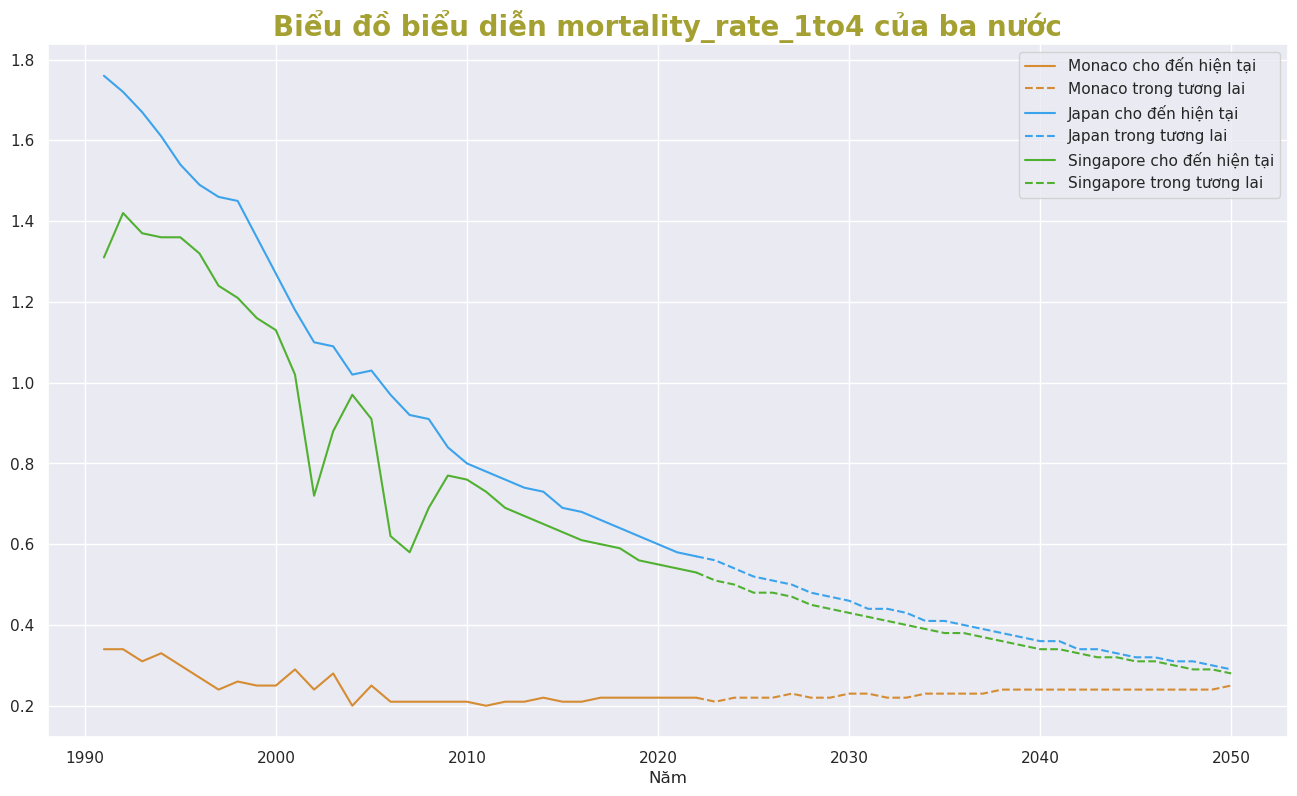

In [90]:
visualizeLineCharts('mortality_rate_1to4')

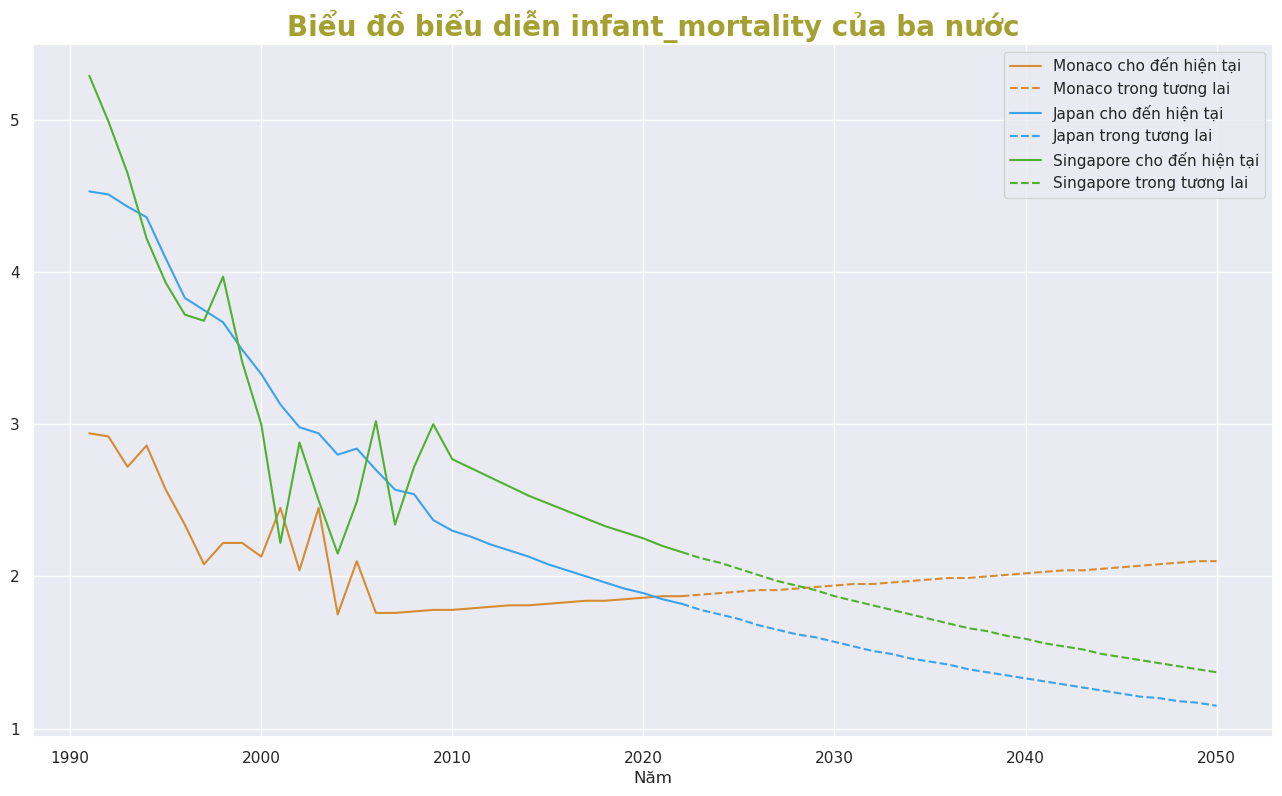

In [91]:
visualizeLineCharts('infant_mortality')

##### Nhận xét:
- Tới trước 2010, nhìn chung thì thấy tỉ lệ tử vong ở trẻ sơ sinh và từ 1 đến 4 tuổi ở các nước có xu hướng giảm. Tuy nhiên, có những biến động mạnh lên xuống ở trước năm 2000 đến gần 2010 ở `Singapore` và `Monaco`. Còn `Nhật Bản` giảm dần khá ổn định.
- Sau 2010, `Nhật Bản` và `Singapore` có tỉ lệ tử vong ở trẻ sơ sinh và từ 1 đến 4 tuổi giảm dần rất đều, nên dữ liệu dự đoán 2 nước này sẽ tiếp tục giảm tiếp. Còn với `Monaco` thì tỉ lệ ở trẻ sơ sinh và từ 1 đến 4 tuổi có xu hướng tăng, nên dữ liệu dự đoán `Monaco` sẽ tiếp tục tăng.
> Tương quan với biểu đồ `bar chart race` trước đó thì ta thấy, tuổi thọ trung bình tăng khi tỉ lệ tử vong ở trẻ sơ sinh và từ 1 đến 4 tuổi giảm và ngược lại, tuổi thọ trung bình giảm khi tỉ lệ tử vong ở trẻ sơ sinh và từ 1 đến 4 tuổi tăng.

> Qua 2 biểu đồ trên, ta chọn `Nhật Bản` để phân tích tỉ lệ nam nữ ở nước này phân bố như thế nào vì nước này có tỉ lệ gia tăng tuổi thọ trung bình và tỉ lệ tử vong ở trẻ em và trẻ sơ sinh giảm ổn định nhất.

#### Bước 4: Chuẩn bị dữ liệu để trực quan về nước `Nhật Bản`.

In [116]:
df_temp=df1.copy()
df_temp=df_temp.loc[(df_temp['country_name']=='Japan') & (df_temp['year']<=2023)].sort_values('year')
df_temp=df_temp[['country_name','year','life_expectancy_male','life_expectancy_female']]
df_temp.head()

,country_name,year,life_expectancy_male,life_expectancy_female
13743,Japan,1990,75.91,81.87
13727,Japan,1991,76.01,82.10
13744,Japan,1992,76.10,82.32
13745,Japan,1993,76.34,82.64
13746,Japan,1994,76.57,82.95


#### Trực quan dữ liệu để đưa ra nhận xét về đất nước theo quan sát là ổn định nhất.

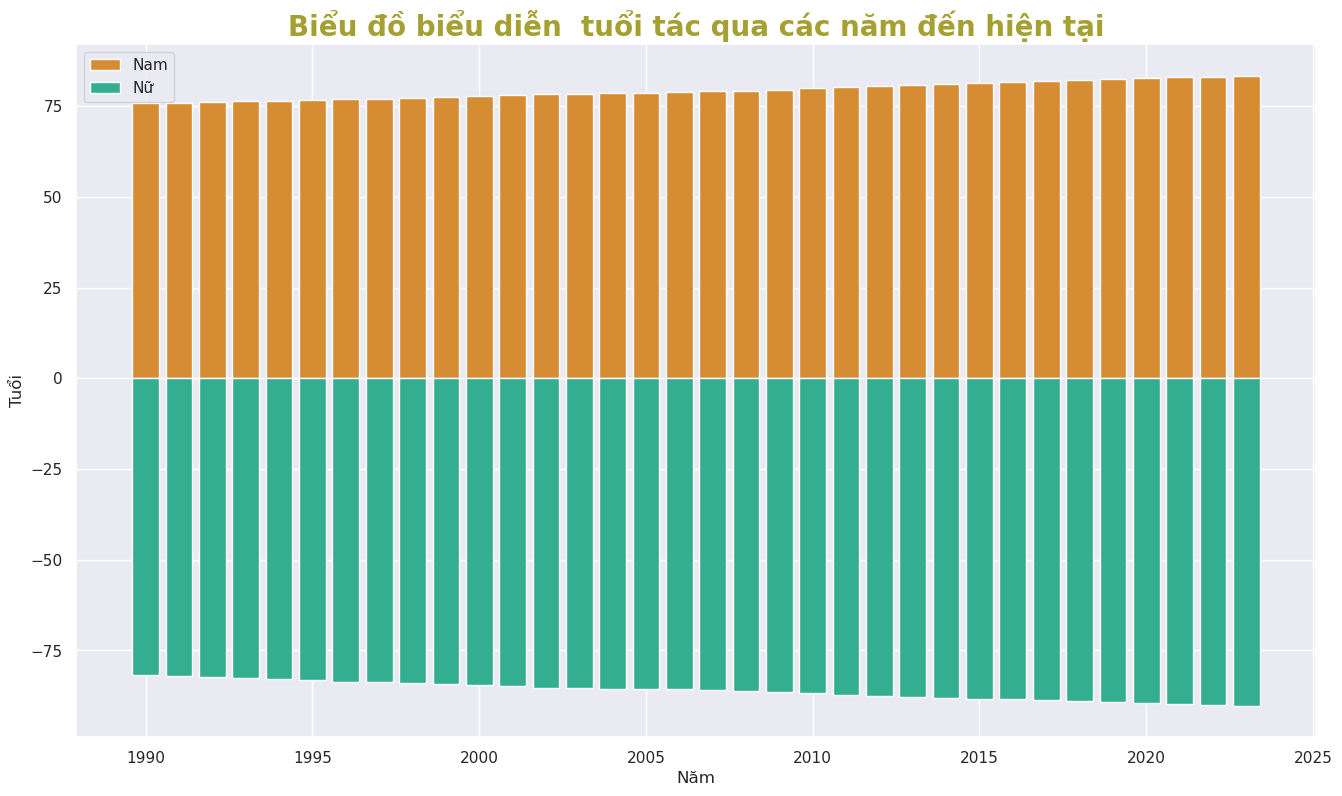

In [117]:
# Tạo đối tượng Figure và Axes
plt.rcParams['figure.dpi'] = 360
palette_color = sns.color_palette("husl", 9)
fig, ax = plt.subplots(figsize=(16,9))

values=['sub_infant_mortality','sub_life_expectancy','sub_mortality_rate_under5','sub_mortality_rate_1to4']
# Vẽ các cột dương và âm
ax.bar(df_temp['year'], df_temp['life_expectancy_male'], color=palette_color[1],label='Nam')
ax.bar(df_temp['year'], -df_temp['life_expectancy_female'], color=palette_color[4],label='Nữ')

# Thiết lập tiêu đề và nhãn trục
ax.set_title('Biểu đồ biểu diễn  tuổi tác qua các năm đến hiện tại',fontsize=20,fontweight='bold',color=palette_color[2],)
ax.set_xlabel('Năm')
ax.set_ylabel('Tuổi')

ax.legend()

# Hiển thị biểu đồ
plt.show()

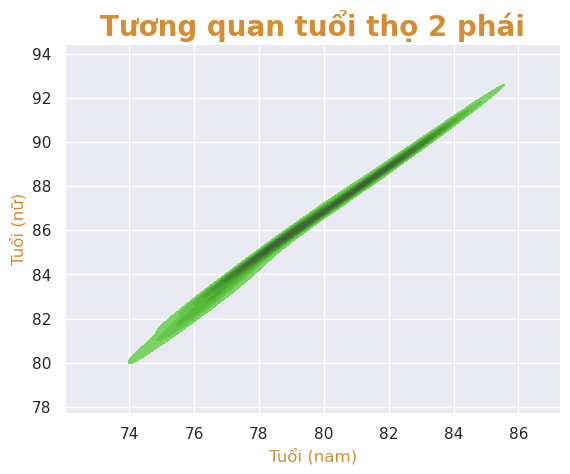

In [168]:
# Create mound chart using seaborn
sns.kdeplot(data=df_temp,x='life_expectancy_male',y='life_expectancy_female', shade=True,color=palette_color[3])

# Set the x and y labels
plt.xlabel('Tuổi (nam)',color=palette_color[1])
plt.ylabel('Tuổi (nữ)',color=palette_color[1])

plt.title('Tương quan tuổi thọ 2 phái',fontsize=20,fontweight='bold',color=palette_color[1])


# Show the plot
plt.show()

##### Nhận xét:
- Nước `Nhật Bản` đang có xu hướng tăng tuổi thọ trung bình ở cả nam và nữ và tăng đều qua các năm đến hiện tại.
- Tuy có sự chênh lệch về tuổi thọ trung bình nam và nữ ở các năm nhưng ta quan sát ở biểu đồ 2, tuổi thọ trung bình ở hai phái tăng theo đường tuyến tính.

In [169]:
def visualizeDiffSexBarChart(i):
    df_temp=df1.copy()
    if i==1: df_temp=df_temp.loc[(df_temp['country_name']=='Japan') & (df_temp['year']<=2023)].sort_values('year')
    else: df_temp=df_temp.loc[(df_temp['country_name']=='Japan') & (df_temp['year']>=2023)].sort_values('year')
    df_temp=df_temp[['country_name','year',
                     'life_expectancy_male','life_expectancy_female',
                     'mortality_rate_under5_male','mortality_rate_under5_female']]
    df_temp['sub_life_expectancy']=df_temp['life_expectancy_female']-df_temp['life_expectancy_male']
    df_temp['sub_mortality_rate_under5']=df_temp['mortality_rate_under5_female']-df_temp['mortality_rate_under5_male']


    df_temp=df_temp[['country_name','year','sub_life_expectancy','sub_mortality_rate_under5']]
    df_temp
    # Tạo đối tượng Figure và Axes
    plt.rcParams['figure.dpi'] = 360
    palette_color = sns.color_palette("husl", 9)
    fig, ax = plt.subplots(figsize=(17,10))

    values=['sub_infant_mortality','sub_life_expectancy','sub_mortality_rate_under5','sub_mortality_rate_1to4']
    # Vẽ các cột dương và âm
    ax.bar(df_temp['year'], df_temp['sub_life_expectancy'], color=palette_color[5],label='Độ chênh lệch tuổi thọ trung bình')
    
    # Thiết lập tiêu đề và nhãn trục
    ax.set_title('Biểu đồ biểu diễn độ chênh lệch tuổi tác qua các năm đến hiện tại',fontsize=20,fontweight='bold',color=palette_color[1])
    ax.set_xlabel('Năm',color=palette_color[1])
    ax.set_ylabel('Độ chênh lệch (Tuổi)',color=palette_color[1])
    ax.legend()

    # Hiển thị biểu đồ
    plt.show()


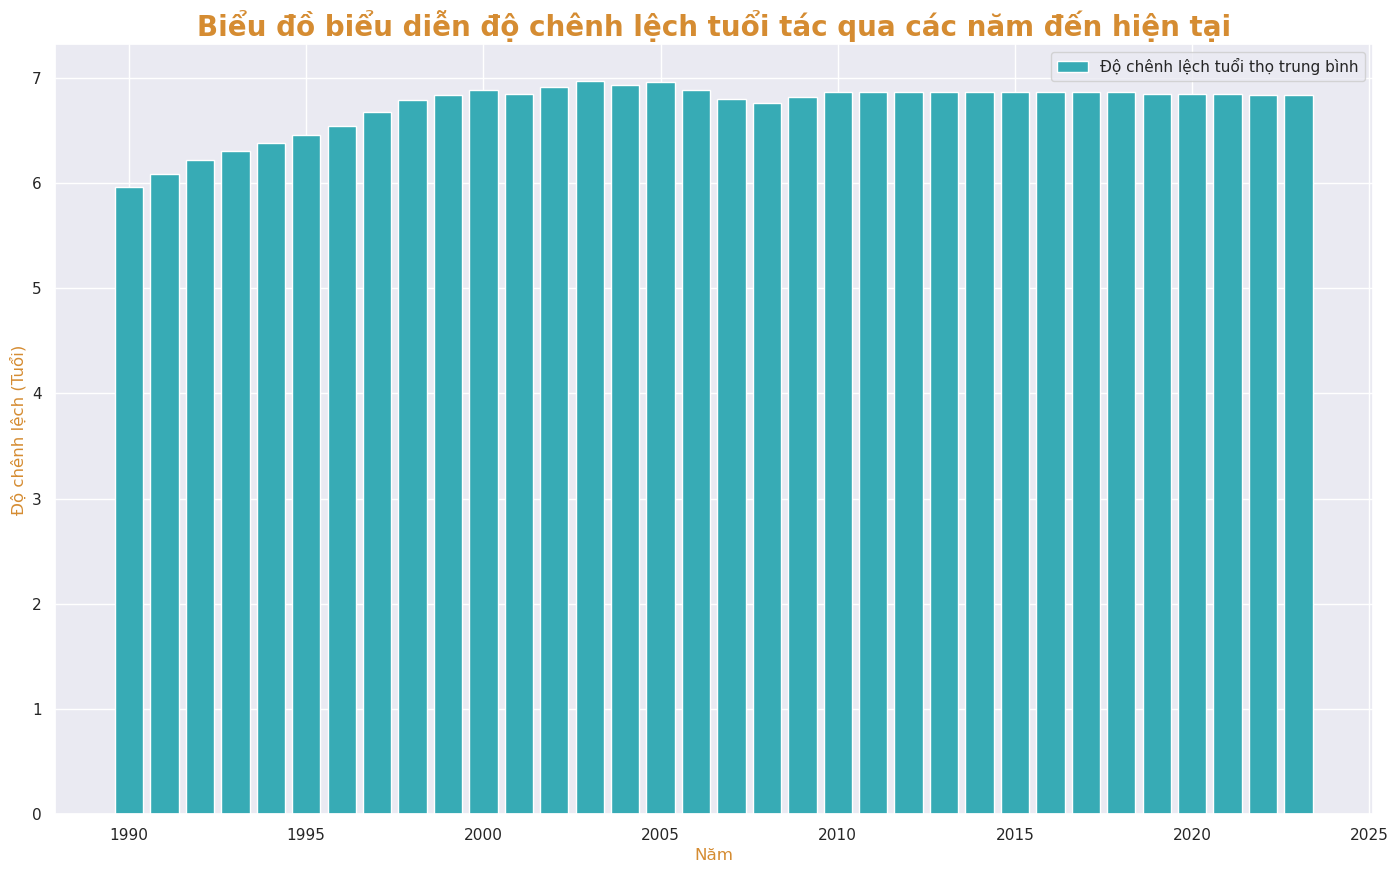

In [170]:
visualizeDiffSexBarChart(1)

##### Nhận xét: 
- Dù có xu hướng gia tăng tuổi thọ trung bình cả nam và nữ, nhưng độ chênh lệch tuổi tác giữa hai giới tính lại có hướng tăng. 
    > Điều này có thể dẫn đến sự thay đổi tỉ lệ giới tính trong xã hội gây ra một số ảnh hưởng tiêu cực đến xã hội và kinh tế của một quốc gia:
    - Nếu dân số nữ có tuổi thọ trung bình cao hơn so với nam, điều này có thể dẫn đến sự chênh lệch giới tính trong dân số. Điều này có thể dẫn đến một số vấn đề xã hội khác như sự thiếu hụt vợ hoặc chồng, tình trạng độc thân kéo dài, tăng cao tỷ lệ ly hôn, và các vấn đề về tình dục và sinh sản.
    - Tác động đến lực lượng lao động: Nếu dân số nữ có tuổi thọ trung bình cao hơn so với nam, điều này có thể dẫn đến sự thiếu hụt lao động nam trong một số ngành công nghiệp, ảnh hưởng đến sự phát triển kinh tế và các hoạt động sản xuất. 
    - Tăng chi phí trợ cấp hưu trí: Nếu dân số nữ có tuổi thọ trung bình cao hơn so với nam, điều này có thể dẫn đến tăng chi phí của các chính sách trợ cấp hưu trí và các chương trình an sinh xã hội.
    


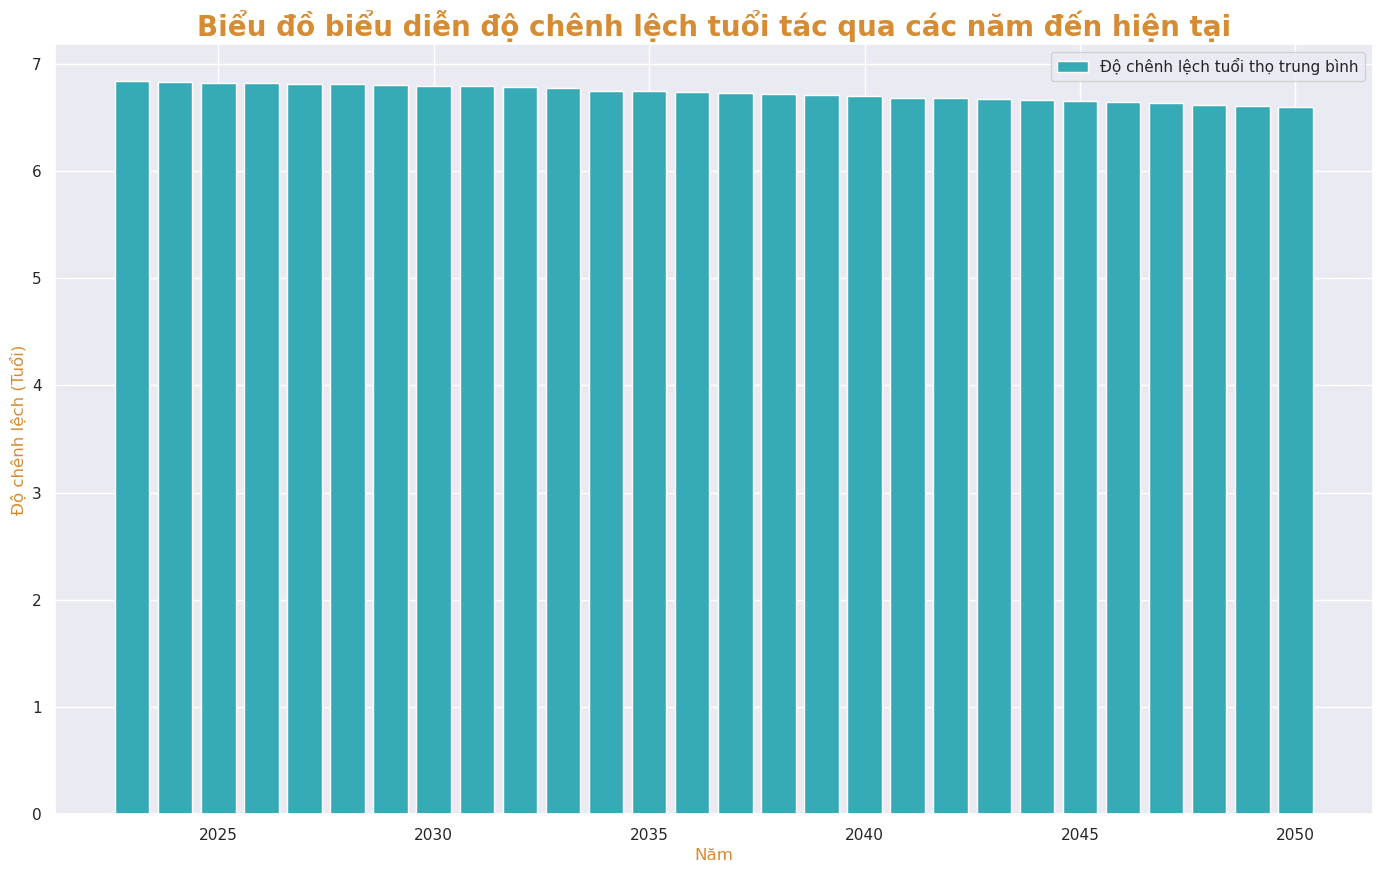

In [171]:
visualizeDiffSexBarChart(2)

##### Nhận xét:
- Trong tương lai, dự đoán độ chênh lệch tuổi tác trung bình của nam và nữ ở `Nhật Bản` sẽ có xu hướng giảm nhờ các chính sách của đất nước.
> Xu hướng thu hẹp độ chênh lệch sẽ giúp cân bằng giới tính trong xã hội, điều này cũng có ảnh hưởng đến tuổi thọ trung bình của một quốc gia. Tuy vậy, không phải là yếu tố duy nhất quyết định sự gia tăng tuổi thọ trung bình của dân số. Việc nâng cao tuổi thọ trung bình của một quốc gia đòi hỏi sự cải thiện chất lượng cuộc sống, chăm sóc sức khỏe và giáo dục của dân số, cùng với việc giải quyết các vấn đề về an sinh xã hội và kinh tế. Điều mà `Nhật Bản` đang thực hiện rất tốt.